In [2]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [3]:
conv_base=VGG16(weights="imagenet",include_top=False,input_shape=(150,150,3))

2025-10-12 02:28:41.602627: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-10-12 02:28:41.602688: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-10-12 02:28:41.602694: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.88 GB
2025-10-12 02:28:41.602737: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-12 02:28:41.602750: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
conv_base.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
conv_base.trainable=False

In [8]:
#training data generator for model 
train_ds=keras.utils.image_dataset_from_directory(
    directory="/Users/owner/Desktop/deep-learning/CNN/CatvsDog/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(150,150)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/Users/owner/Desktop/deep-learning/CNN/CatvsDog/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 12841 files belonging to 2 classes.
Found 2290 files belonging to 2 classes.


In [9]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10


2025-10-12 02:29:12.561724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


402/402 ━━━━━━━━━━━━━━━━━━━━ 43s 104ms/step - accuracy: 0.9735 - loss: 0.1660 - val_accuracy: 0.7057 - val_loss: 1.0691
Epoch 2/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 49s 121ms/step - accuracy: 0.9837 - loss: 0.0485 - val_accuracy: 0.6201 - val_loss: 2.0038
Epoch 3/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 98s 243ms/step - accuracy: 0.9887 - loss: 0.0341 - val_accuracy: 0.7598 - val_loss: 0.8607
Epoch 4/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 43s 106ms/step - accuracy: 0.9924 - loss: 0.0247 - val_accuracy: 0.7214 - val_loss: 1.2972
Epoch 5/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - accuracy: 0.9930 - loss: 0.0210 - val_accuracy: 0.7437 - val_loss: 1.2240
Epoch 6/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 34s 83ms/step - accuracy: 0.9963 - loss: 0.0108 - val_accuracy: 0.7782 - val_loss: 0.9887
Epoch 7/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 43s 108ms/step - accuracy: 0.9976 - loss: 0.0082 - val_accuracy: 0.7716 - val_loss: 1.2284
Epoch 8/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - accuracy: 0.9987 - loss: 0.0053 - val_ac

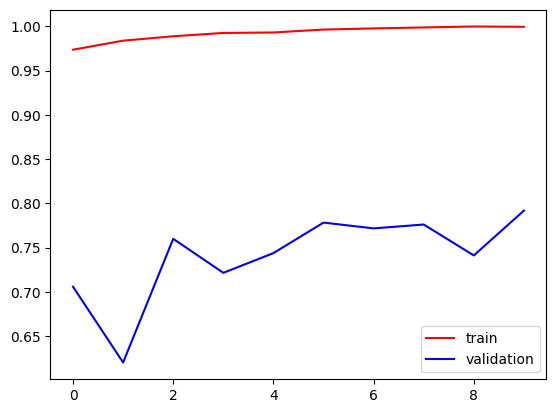

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

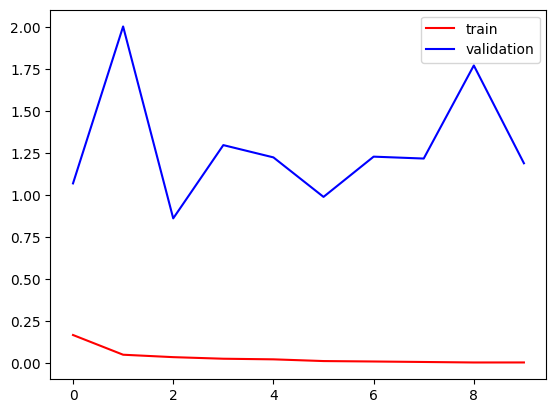

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
import cv2


test_img = cv2.imread("/Users/owner/Desktop/deep-learning/CNN/preview/dog.jpg")


# Resize the image
test_img = cv2.resize(test_img, (150, 150))

# Reshape for model input
test_input = test_img.reshape(1, 150, 150, 3)

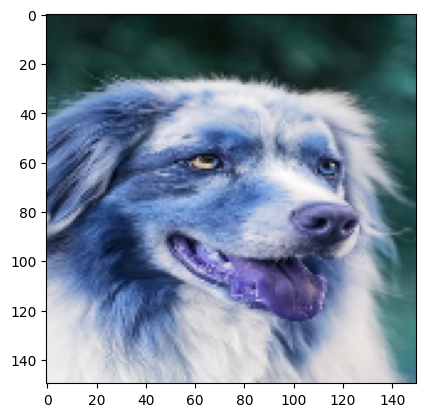

In [15]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [16]:
predictions = model.predict(test_input)  # shape: (batch_size, 1) or (batch_size, num_classes)
if predictions[0] ==1 :
    print("Dog")
else:
    print("Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
Dog
